<a href="https://colab.research.google.com/github/lcnature/PSY291/blob/main/PSY291_Ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 2 Frequency Distribution**


We will learn how to visualize data today

*introduction to this notebook:*

Each cell containing code in this notebook can be executed one by one, by either hitting the triangle button on the left of the cell, or press "shift + enter" after you put your cursor into a cell containing code.

If you messed up in any way, press the "Runtime" menu on the top and press the "Restart session" button. The notebook will return to its initial state, discarding all your changes.

If you don't want to learn any coding and just want to see all the figures with text, choose "Runtime" menu and then "Run all"




---

### An example of data
Fred wants to use Patient Health Questionnaire (PHQ-9) below to assess how students' symptoms of depression change before and after the exam.



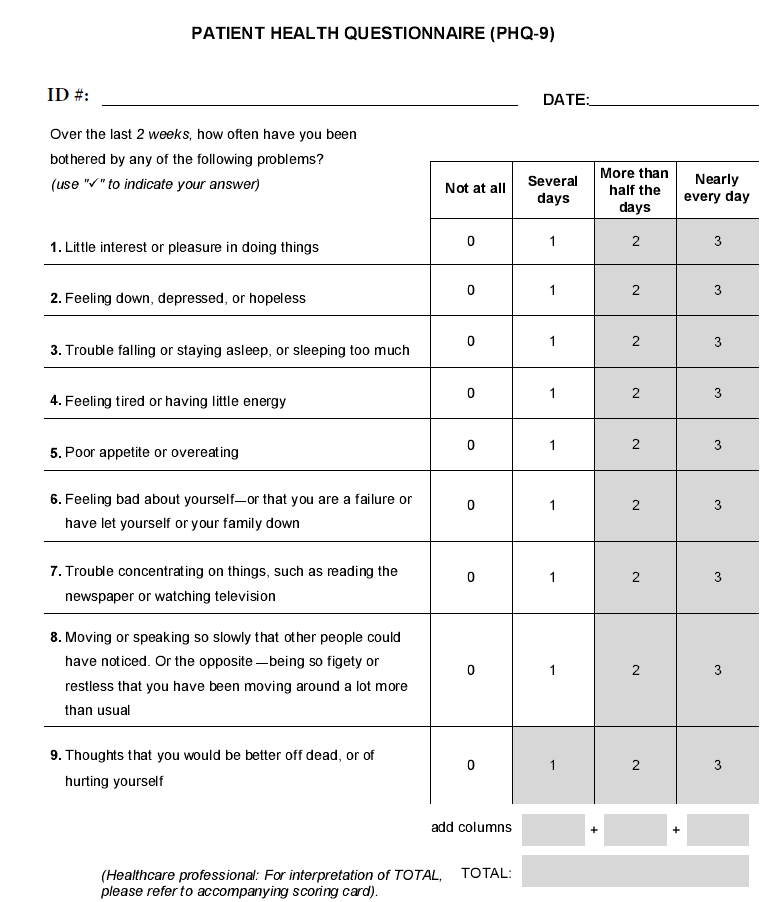



---
For each participant, he summed the score (response) to all 9 items.
He tested 100 participants.

Here are the scores he obtained from the participants (he puts them in a list):

[1,3,3,11,1,3,1,2,2,1,4,2,0,1,4,3,0,0,3,1,2,1,2,1,9,3,2,1,1,0,1,6,1,5,1,5,1,3,4,2,0,1,0,7,0,3,1,8,1,1,8,1,1,3,2,4,4,4,3,0,4,9,2,3,0,4,2,1,3,1,2,2,0,0,3,0,1,1,0,1,0,4,3,2,0,2,0,8,2,2,1,2,0,0,5,20,1,0,0,3]

Fred wants to get a general sense of how the scores are distributed.

So he decides to count the number of participants who scored each unique value in this list, and maybe even plot them with a graph. This is called **frequency distribution**.

How should he do it?

---
## Create a frequency distribution table

To do any operation with data, we first need to give them a variable name so that we can tell our computer which data to analyze or visualize

Here, we call the data `X`



In [ ]:


X = [1,3,3,11,1,3,1,2,2,1,4,2,0,1,4,3,0,0,3,1,2,1,2,1,9,3,2,1,1,0,1,6,1,5,1,5,1,
     3,4,2,0,1,0,7,0,3,1,8,1,1,8,1,1,3,2,4,4,4,3,0,4,9,2,3,0,4,2,1,3,1,2,2,0,0,3,
     0,1,1,0,1,0,4,3,2,0,2,0,8,2,2,1,2,0,0,5,20,1,0,0,3]
# X is now a `list` in Python


Next, we try to find what unique values the variable `X` has obtained in our data.

We use a function called `unique` in a package called `numpy` to achieve this.

In [ ]:

import numpy as np
"""
Importing a package means we make the functions in this package availale for us
to use in this notebook.
Here, to save our work of typing, we give the package numpy a short name `np`.
So from now on, to call any function, we write np.??? where ??? is your function
name.
A function in programming language is something that can achieve a function / do
some pre-defined operation.
"""


unique_values, counts = np.unique(X, return_counts=True)
# The function `unique` requires a data to analyze.
# By default, it just returns the unique values in the list you give it.
# You can optionally tell it to count how many unique items are equal to
# each unique values.

print('unique values in our data:', unique_values)



unique values in our data: [ 0  1  2  3  4  5  6  7  8  9 11 20]


To print a table that shows how many participants got each of the values above, we can use another package called `pandas`. It organizes data into a table of many columns with their names, so that we can easily print them or do some operation on them. Here we just use it for displaying the variable `unique_values` and `counts` we have just obtained.

In [ ]:
import pandas as pd

df = pd.DataFrame({'X':unique_values, 'f': counts})
# Here {} indicates we are putting data into a structure called "dictionary".
# A dictional has a key (here, 'X' and 'f') and contents (the arrays
# `unique_values` and `counts`)

print(df.to_string(index=False))

 X  f
 0 20
 1 27
 2 17
 3 15
 4  9
 5  3
 6  1
 7  1
 8  3
 9  2
11  1
20  1


### calculating sum with a frequency distribution table
We can calculate the sum of all the data in `X` in two ways:
- We can take the sum of all the elements in `X` directly as `ΣX` of the raw data
- We can also multiply the values in the frequency distribution table by their counts (frequencies) and take the sum of the products as `ΣXf`

In [ ]:
# Calculate the sum of X directly:
sum_X1 = np.sum(X)
print('sum of the scores calculated directly:', sum_X1)
print()

# Calculate the sum of X using the frequency table.
# We first calculate the products between each value and its count (frequency):

Xf = df['X'] * df['f']
# Here, * means mulplication. `df['X']` means we take the column with name 'X'.
# Because the two columns have the same length, we can multiply each pair of
# elements in the two columns, and get an array of the same length as the
# original columns.


# we put it into the dataframe table for display
df['Xf'] = Xf
print('new table with Xf')
print(df.to_string(index=False))

sum_X2 = np.sum(df['Xf'])
# this takes the sum of `Xf`
print('sum of the scores calculated using the frequency table:', sum_X2)



sum of the scores calculated directly: 243

new table with Xf
 X  f  Xf
 0 20   0
 1 27  27
 2 17  34
 3 15  45
 4  9  36
 5  3  15
 6  1   6
 7  1   7
 8  3  24
 9  2  18
11  1  11
20  1  20
sum of the scores calculated using the frequency table: 243


### calculating the **relative frequency** (**proportion**) of each value

We want to know what proportion of participants had each of the scores in PQH-9

For this, we need to know the total number of scores (of course we know it is 100, but we can also take the sum of `f`).

Then, we divide each frequency by the total number `n` to get the relative frequency.

In [ ]:
# Total number of participants
# We can calculate it by counting the original `X` directly, or we can take
# the sum of `f` in the frequency distribution table

n = len(X)
print('number of participants by counting data:', n)

n = np.sum(df['f'])
print('number of participants by summing f:', n)

# Now we can divide f by n to get proportion.
df['p'] = df['f'] / n
print(df.to_string(index=False))

print('All the proportions should sum to ', np.sum(df['p']))

number of participants by counting data: 100
number of participants by summing f: 100
 X  f  Xf    p
 0 20   0 0.20
 1 27  27 0.27
 2 17  34 0.17
 3 15  45 0.15
 4  9  36 0.09
 5  3  15 0.03
 6  1   6 0.01
 7  1   7 0.01
 8  3  24 0.03
 9  2  18 0.02
11  1  11 0.01
20  1  20 0.01
All the proportions should sum to  1.0


We can sometimes represent the proportion by percentage. Simply multiply the proportions by 100 and add a `%` sign

In [ ]:
df['percentage(%)'] = df['p'] * 100
print(df.to_string(index=False))

 X  f  Xf    p  percentage(%)
 0 20   0 0.20           20.0
 1 27  27 0.27           27.0
 2 17  34 0.17           17.0
 3 15  45 0.15           15.0
 4  9  36 0.09            9.0
 5  3  15 0.03            3.0
 6  1   6 0.01            1.0
 7  1   7 0.01            1.0
 8  3  24 0.03            3.0
 9  2  18 0.02            2.0
11  1  11 0.01            1.0
20  1  20 0.01            1.0


---

## Visualize the distribution of data
Let's learn to draw some graphs.



### draw a histogram

One way to visualize the distribution is to group the values of data into equally-spaced bins (intervals) and draw a bar for each bin with it heights being proportional to the count of observations in that bin. This is called **histogram**

We do this by using a function called `hist` from a subpackage `pyplot` of a package `matplotlib`.

Instead of giving the function the frequency distribution table we have created, we actually give it our raw data.

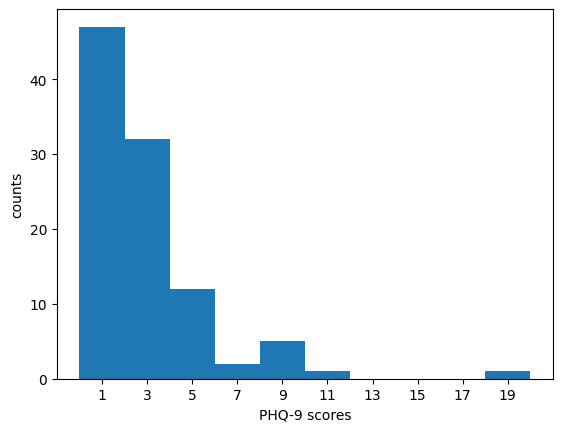

In [ ]:
import matplotlib.pyplot as plt
# `plt` is a common abbreviation used for this subpackage, just as `np` for
# `numpy` and `pd` for `pandas`


count_per_bin, bins, _ = hist_result = plt.hist(X)
# This command makes a histogram figure
# The function supposedly returns 3 outputs. We don't need the last one, so we use
# `_` just to assign that output to an unnamed variable (meaning we discard it).

plt.xlabel('PHQ-9 scores')
plt.ylabel('counts')
# ALWAYS add a label to your axis to explain what it is

xticks = (bins[:-1] + bins[1:]) / 2
plt.xticks(xticks)
# we set the ticks to be centered at each bin

plt.show()
# Then we ask the package to show it after drawing everying




You might have noticed that there are fewer bars than the unique values in our data. This is because if we don't tell `hist` function how to bin our data, it will default to distribute data into 10 equally spaced bins.

Let's see where the bin boundaries are located

In [ ]:
print('the boundaries of all the bins:')
print(bins)
print()
print('counts in each bin:')
print(count_per_bin)

the boundaries of all the bins:
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]

counts in each bin:
[47. 32. 12.  2.  5.  1.  0.  0.  0.  1.]


This defaut behavior is not best alighed with what our textbook recommend.

For example, it is better to make the bin boundaries at the middle of two adjacent intergers (e.g., 1.5). Let's ensure this in the code below.

### controlling how we group data
We can decide the bins ourselves

- refer to the four guidelines for *class intervals* of *grouped frequency distribution table*

Here, let's group every two adjacent integers to a *class interval*, i.e., make the bin size equal to 2




[-0.5  1.5  3.5  5.5  7.5  9.5 11.5 13.5 15.5 17.5 19.5 21.5]


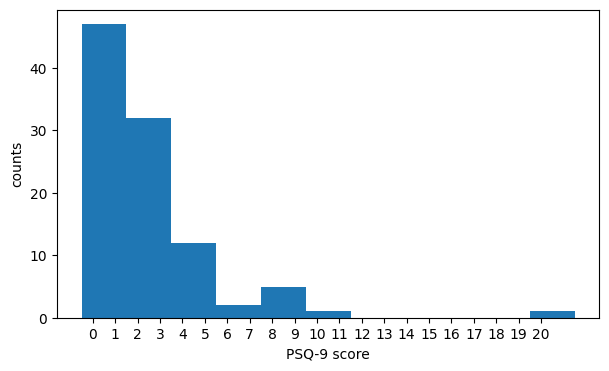

In [ ]:
# We can decide the interval boundaries directly
bin_size = 2.0
bin_boundaries = np.arange(np.min(X)-0.5, np.max(X)+bin_size+0.5, bin_size)
print(bin_boundaries)
fig = plt.figure(figsize=[7,4])
# This controls the shape of the figure
plt.hist(X, bins=bin_boundaries)
plt.xlabel('PSQ-9 score')
plt.ylabel('counts')
xticks = np.arange(np.min(X), np.max(X)+1,1)
plt.xticks(xticks)
plt.show()




The choice of bins determines whether we look at the coarse pattern of the data distribution or fine details.

We can look at the data at the finest level (bin size = 1). Although our textbook does not recommend it, it does not hurt to see how it looks like.


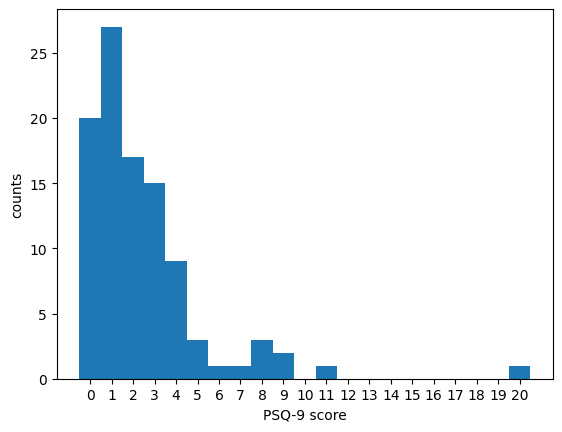

In [ ]:
# We know that our data are integers. So we can bin size as 1.

bin_size = 1.0
bin_boundaries = np.arange(np.min(X)-0.5, np.max(X)+bin_size+0.5, bin_size)

plt.hist(X, bins=bin_boundaries)
plt.xlabel('PSQ-9 score')
plt.ylabel('counts')
xticks = (bin_boundaries[:-1] + bin_boundaries[1:]) / 2
plt.xticks(xticks)
plt.show()



### polygon graph

Another way to visualize data is to draw a contour to depict the distribution

We will borrow the example from the textbook without illustration of how to plot it (you can use `plot` function of `matplotlib.pyplot` with some tweaking).


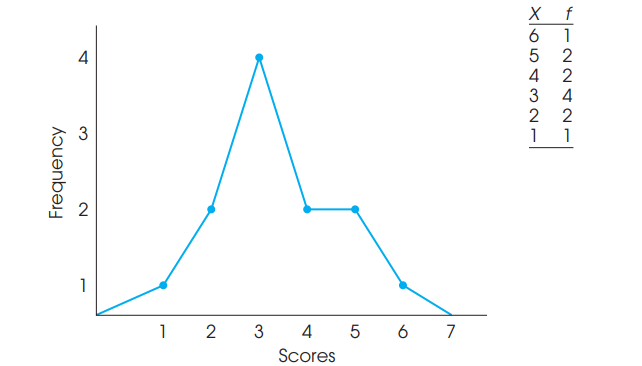


### Draw a bar graph for data from nominal scale

Let's say we asked our classmates of everyone's favorite sport and got the following responses:


In [ ]:
favorite_sports = ['basketball', 'swimming', 'basketball', 'basketball',
                   'tennis', 'basketball', 'tennis', 'basketball', 'tennis', 'swimming']

We can also display the distribution with a bar graph

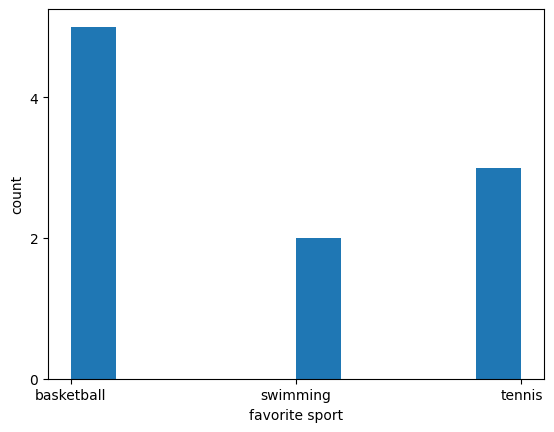

In [ ]:
plt.hist(favorite_sports)
plt.yticks([0,2,4])
plt.ylabel('count')
plt.xlabel('favorite sport')
plt.show()

---

## Visualize population distribution

We typically don't know how the scores of a population is distributed until we get all the data.

But often we can make some assumptions or guess of what type of distributions might approximate the true distribution of a population based on the histogram of our sample.

A most frequently encountered distribution is **Gaussian distribution**, also called **normal distribution**

IQ is supposed to be normalized such that its mean is 100 with *standard deviation* (a way to quantify its spread) of 15

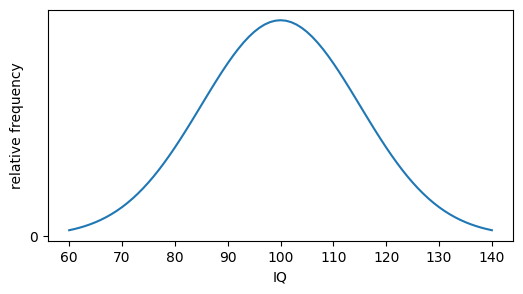

In [ ]:
from scipy.stats import norm
# `norm` is a module for normal distribution
import matplotlib.pyplot as plt
import numpy as np

IQ = np.arange(60, 141)
# x becomes an array of 60, 61, ..., 140
p = norm.pdf(IQ, loc=100, scale=15)
# this function returns the probabilistic density function (how dense the
# Gaussian distribution is at each value of x) for a normal distribution centered
# at 100 with a spread of 15.

plt.figure(figsize=[6,3])
plt.plot(IQ,p)
plt.xlabel('IQ')
plt.ylabel('relative frequency')
plt.yticks([0])
plt.show()

---
The shape of a frequency distribution

A distribution can be roughly characterized by three aspects:
- shape
- central tendency (where its center is located)
- variability (spread)


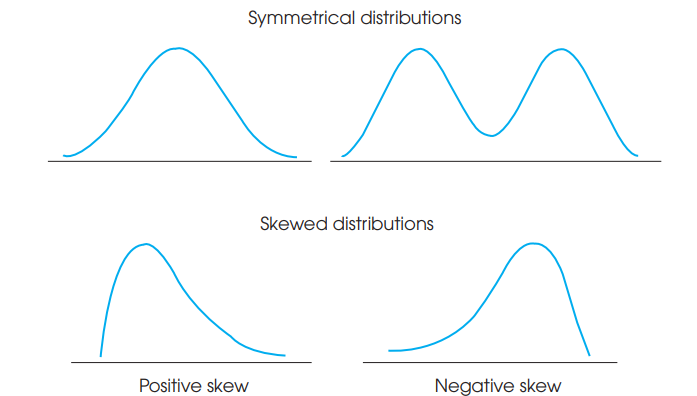

## Homework
Read through this notebook and execute each cell if you have not done so during the class. If some codes are confusing, you can just focus on understanding the text and graphs

Feel free to change the code in any way and see the effect if you feel you understand it.